In [1]:
%config InlineBackend.figure_format = 'svg'
import quimb.tensor as qtn
from quimb.tensor.tensor_core import *

In [2]:
tn = qtn.TN2D_rand(6, 5, 3, seed=42)

tags = ['I2,1', 'I3,1']

tn ^ ...

-18980941981.35615

In [3]:
# tn.compress_between(tags[0], tags[1], max_bond=2, cutoff=0.0, absorb='both', canonize_distance=2)

In [4]:
tida, tidb = tn._get_tids_from_tags(tags, 'any')
tida, tidb

(11, 16)

In [14]:
tidsl = qtn.oset([tida])
tidsr = qtn.oset([tidb])

tree = tn.get_tree_span([tida, tidb], max_distance=2, inwards=False)

for tido, tidi, _ in tree:
    if tidi in tidsl:
        tidsl.add(tido)
    else:
        tidsr.add(tido)

In [18]:
tidsl,  tidsr

SyntaxError: invalid syntax (2851249613.py, line 1)

In [18]:
tnc = tn.copy()
tnc._compress_between_tids(tida, tidb, max_bond=2, cutoff=0.0, canonize_distance=2)
1 -  (tnc ^ ...) / (tn ^ ...)

0.5507261141796282

In [27]:
tnc = tn.copy()
_compress_between_unitree_tids(tnc, tida, tidb, max_bond=2, cutoff=0.0, r=2)
# _compress_between_overlaptrees_tids(tnc, tida, tidb, max_bond=2, cutoff=0.0, r=2)
1 -  (tnc ^ ...) / (tn ^ ...)

0.5507261141796282

In [7]:
# tids = [tida]
# exclude = [tidb]
# tree = tn.get_tree_span(tids, exclude=exclude, max_distance=2)
# tree

In [8]:
tids = [tida, tidb]
ta, tb = tn.tensor_map[tida], tn.tensor_map[tidb]
_, bix, _ = tensor_make_single_bond(ta, tb)
tree = tn.get_tree_span(tids, max_distance=2)

In [9]:
Rl, Rr = _compute_tree_gauges(tn, tree, [(tida, bix), (tidb, bix)])
Pl, Pr = _compute_oblique_projectors(Rl, Rr.T, max_bond=2, cutoff=0.0)

In [10]:
tn ^ ...

-18980941981.35615

In [179]:
ta.gate_(Pl.T, bix)
tb.gate_(Pr, bix)

Tensor(shape=(3, 3, 3, 2), inds=('_26692fAAAUi', '_26692fAAAUk', '_26692fAAAUl', '_26692fAAAUc'), tags=oset(['I3,1', 'X3', 'Y1']))

In [180]:
tn ^ ...

-8527641560.494942

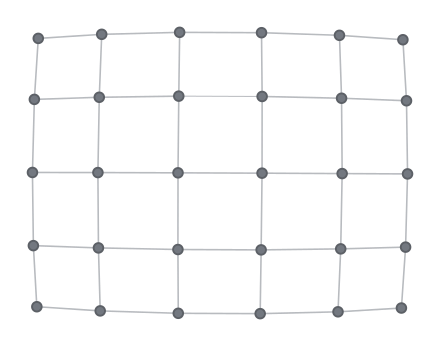

In [181]:
tn.draw()